In [55]:
from keras.models import load_model
from metrics import precision, recall
from keract import get_activations, display_activations
from generators import DataGeneratorC
import matplotlib.pyplot as plt

classifier = '/Users/nicolamarinello/ctasoft/cta-lstchain/cnn/ClassifierV2_2018-12-27_12-02/ClassifierV2_05_0.96543.h5'
model = load_model(classifier, custom_objects={'precision': precision, 'recall': recall})

data_f = ['/Users/nicolamarinello/simulations/gamma_20deg_0deg_srun800-4169___cta-prod3_desert-2150m-Paranal-HB9_interp.h5']
gen = DataGeneratorC(data_f, batch_size=1, shuffle=True)
x = gen.__getitem__(1000)

(100, 100)


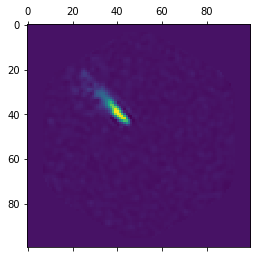

In [56]:
print(x[0][0][0].shape)

plt.matshow(x[0][0][0])

In [57]:
def print_names_and_shapes(activations):  # dict
    for layer_name, layer_activations in activations.items():
        print(layer_name)
        print(layer_activations.shape)
        print('')

In [86]:
#print_names_and_shapes(get_activations(model, x[0]))
act = get_activations(model, x[0])
print_names_and_shapes(act)

conv2d_1_15/Relu:0
(1, 16, 98, 98)

conv2d_2_15/Relu:0
(1, 16, 96, 96)

average_pooling2d_1_15/transpose_1:0
(1, 16, 48, 48)

dropout_1_15/cond/Merge:0
(1, 16, 48, 48)

conv2d_3_15/Relu:0
(1, 32, 46, 46)

conv2d_4_15/Relu:0
(1, 32, 44, 44)

average_pooling2d_2_15/transpose_1:0
(1, 32, 22, 22)

dropout_2_15/cond/Merge:0
(1, 32, 22, 22)

flatten_1_15/Reshape:0
(1, 15488)

dense_1_15/Relu:0
(1, 128)

dropout_3_15/cond/Merge:0
(1, 128)

dense_2_15/Relu:0
(1, 256)

dropout_4_15/cond/Merge:0
(1, 256)

dense_3_15/Sigmoid:0
(1, 1)



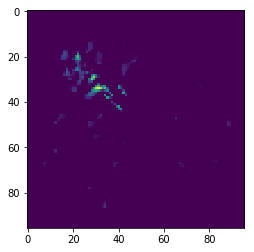

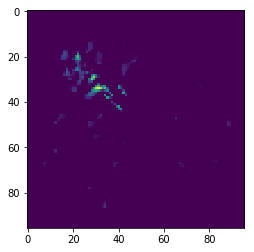

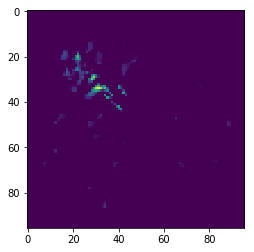

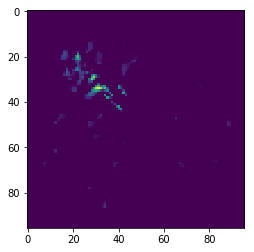

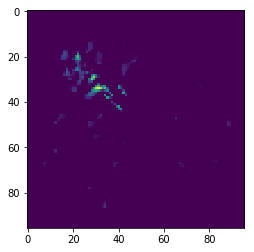

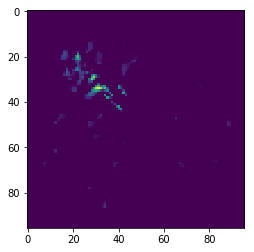

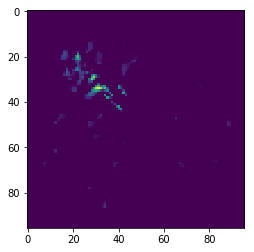

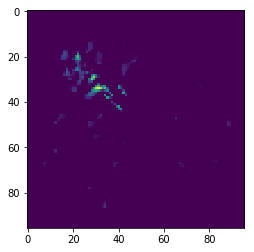

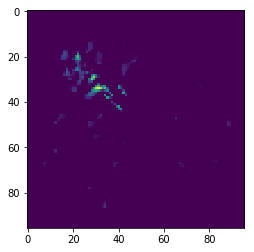

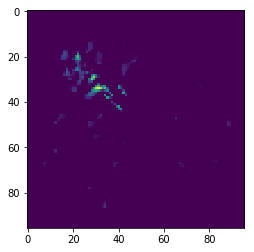

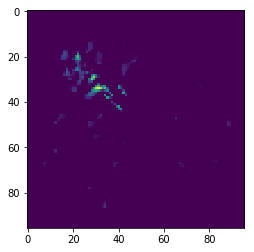

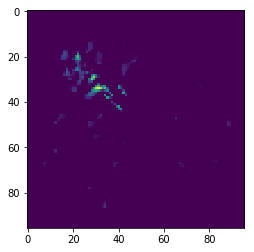

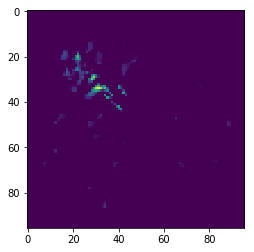

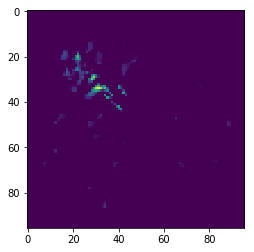

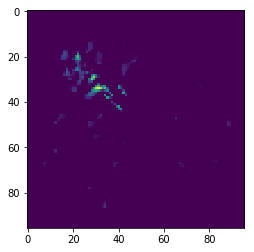

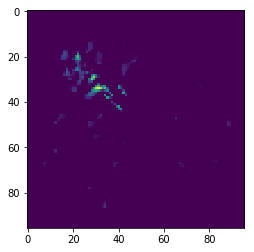

In [94]:
activation_maps = list(act.values())
for i in range(0, 16):
    plt.imshow(activation_maps[1][0][15])
    plt.pause(0.9)
plt.show()